In [1]:
import sqlite3
import numpy as np
import mysql.connector
import pandas as pd
import getpass
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
plotly.tools.set_credentials_file(username='mainakchain', api_key='B9m4DVrYYmsoW3jDSiok')
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
import plotly.figure_factory as ff
from scipy import stats
from sklearn.utils import shuffle
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from datetime import timedelta
from sklearn.ensemble import RandomForestRegressor
import datetime
import holidays
from sklearn.model_selection import cross_val_score
from sklearn.metrics import median_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.cross_validation import StratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVR
from sklearn.svm import SVR

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



In [2]:
toll_time = pd.read_csv('toll_time.csv')

In [3]:
toll_time[toll_time['vehicle_no'] == ]

0       2017-11-22 19:58:42
1       2017-11-22 19:48:56
2       2017-11-22 19:49:11
3       2017-11-25 11:27:55
4       2017-11-25 11:45:40
5       2017-11-24 19:01:37
6       2017-11-10 20:42:58
7       2017-11-25 19:19:42
8       2017-11-25 13:30:09
9       2017-11-02 19:34:40
10      2017-11-23 10:16:30
11      2017-11-23 17:36:39
12      2017-11-10 20:29:13
13      2017-11-24 06:12:21
14      2017-11-15 09:33:06
15      2017-11-23 08:51:40
16      2017-11-03 20:04:46
17      2017-11-11 20:37:43
18      2017-11-11 20:36:58
19      2017-11-09 21:26:00
20      2017-11-10 20:36:57
21      2017-11-10 20:40:20
22      2017-11-10 20:40:20
23      2017-11-09 21:27:33
24      2017-11-03 19:54:48
25      2017-11-22 19:58:42
26      2017-11-22 19:48:56
27      2017-11-22 19:49:11
28      2017-11-25 11:27:55
29      2017-11-25 11:45:40
               ...         
6395    2017-11-12 14:58:13
6396    2017-11-07 11:47:58
6397    2017-11-28 23:11:45
6398    2017-11-27 11:02:29
6399    2017-12-02 0

In [12]:
# OR04M5329
x = toll_time[(toll_time['vehicle_no'] == 'OR04M5329') & (toll_time['start_date'] == '2017-11-25 00:00:00')]
x = x.sort_values('distance_travelled')

In [32]:
x

,Unnamed: 0,origin,destination,toll_both,vehicle_no,loading_out_time,odometer_km,ist_timestamp,distance_from_toll,loading_in_time,start_date,eta,unloading_in_time,slug,delivery_status,distance_travelled,late_by_hrs,time_taken
4699,4481,Jamshedpur,HOSUR,Sergrarh,OR04M5329,2017-11-27 03:32:37,5681.83,2017-11-27 23:36:11,0.723117,2017-11-25 05:57:26,2017-11-25,2017-12-07 00:00:00,2017-12-04 00:00:53,ETXSF000,early,0.00,-77.9425,20.059444
4610,4482,Jamshedpur,HOSUR,Panikholi,OR04M5329,2017-11-27 03:32:37,5775.70,2017-11-28 01:47:22,0.397454,2017-11-25 05:57:26,2017-11-25,2017-12-07 00:00:00,2017-12-04 00:00:53,ETXSF000,early,93.87,-77.9425,22.245833
4482,4483,Jamshedpur,HOSUR,Manguli,OR04M5329,2017-11-27 03:32:37,5829.30,2017-11-28 03:16:23,0.535038,2017-11-25 05:57:26,2017-11-25,2017-12-07 00:00:00,2017-12-04 00:00:53,ETXSF000,early,147.47,-77.9425,23.729444
4141,4484,Jamshedpur,HOSUR,Gudipada (Old Gangapada),OR04M5329,2017-11-27 03:32:37,5885.36,2017-11-28 04:55:32,0.518456,2017-11-25 05:57:26,2017-11-25,2017-12-07 00:00:00,2017-12-04 00:00:53,ETXSF000,early,203.53,-77.9425,25.381944
4186,4485,Jamshedpur,HOSUR,Gurapalli,OR04M5329,2017-11-27 03:32:37,5973.56,2017-11-28 06:51:42,0.438839,2017-11-25 05:57:26,2017-11-25,2017-12-07 00:00:00,2017-12-04 00:00:53,ETXSF000,early,291.73,-77.9425,27.318056
3933,4486,Jamshedpur,HOSUR,Bellupada,OR04M5329,2017-11-27 03:32:37,6057.61,2017-11-28 09:39:14,0.305959,2017-11-25 05:57:26,2017-11-25,2017-12-07 00:00:00,2017-12-04 00:00:53,ETXSF000,early,375.78,-77.9425,30.110278
4434,4487,Jamshedpur,HOSUR,Madapam,OR04M5329,2017-11-27 03:32:37,6172.88,2017-11-28 14:25:34,0.773443,2017-11-25 05:57:26,2017-11-25,2017-12-07 00:00:00,2017-12-04 00:00:53,ETXSF000,early,491.05,-77.9425,34.882500
4060,4488,Jamshedpur,HOSUR,Chilakapalem,OR04M5329,2017-11-27 03:32:37,6200.24,2017-11-28 15:10:50,0.470717,2017-11-25 05:57:26,2017-11-25,2017-12-07 00:00:00,2017-12-04 00:00:53,ETXSF000,early,518.41,-77.9425,35.636944
4563,4490,Jamshedpur,HOSUR,Nathavalasa/ Vizianagaram,OR04M5329,2017-11-27 03:32:37,6240.03,2017-11-28 16:47:30,0.665695,2017-11-25 05:57:26,2017-11-25,2017-12-07 00:00:00,2017-12-04 00:00:53,ETXSF000,early,558.20,-77.9425,37.248056
4390,4489,Jamshedpur,HOSUR,Laxmipuram,OR04M5329,2017-11-27 03:32:37,6240.03,2017-11-28 16:47:30,0.661798,2017-11-25 05:57:26,2017-11-25,2017-12-07 00:00:00,2017-12-04 00:00:53,ETXSF000,early,558.20,-77.9425,37.248056


In [36]:
x.ist_timestamp = x.ist_timestamp.apply(lambda x:datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S') )
x.ist_timestamp.apply(lambda x: x.hour)

4699    23
4610     1
4482     3
4141     4
4186     6
3933     9
4434    14
4060    15
4563    16
4390    16
4832     5
4345     7
4250    12
4656    13
4293    14
3972    17
4742    21
4875    23
4015     7
4100    16
4522    17
4216    21
3908    23
Name: ist_timestamp, dtype: int64

In [3]:
# new_toll_time = toll_time[toll_time['origin'] == 'Jamshedpur'][toll_time['destination'] == 'HOSUR']

In [4]:
toll_time['route'] = toll_time['origin'] + ' ' + toll_time['destination']

In [5]:
def change_route_to_dummy(df):
    num = 1
    dict_route = {}
    for r in df['route'].unique().tolist():
        df['route'] = df['route'].replace({r: num})
        dict_route[num] = r
        num += 1
    return dict_route

In [6]:
dict_route = change_route_to_dummy(toll_time)

In [7]:
toll_time.shape

(6425, 19)

In [8]:
new_toll_time = toll_time.copy()

In [9]:
today_date = datetime.datetime.now()
today_date.strftime("%Y-%m-%d %H:%M:%S")
today = today_date.strftime("%Y-%m-%d %H:%M:%S")
new_toll_time['today'] = datetime.datetime.strptime(today, '%Y-%m-%d %H:%M:%S')

In [10]:
new_toll_time['start_date'] = new_toll_time['start_date'].apply(lambda x:datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S') )
new_toll_time['days_from_now'] = new_toll_time['today'] - new_toll_time['start_date'] 
new_toll_time['days_from_now'] = new_toll_time['days_from_now'].apply(lambda x: x.days)

In [11]:
new_toll_time['unloading_in_time'] = new_toll_time['unloading_in_time'].apply(lambda x:datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S') )
new_toll_time['avg_travel_time'] = new_toll_time['start_date'] + (new_toll_time['unloading_in_time'] - new_toll_time['start_date'])/2

In [12]:
new_toll_time['month_of_travel'] = new_toll_time['avg_travel_time'].apply(lambda x: x.month)

In [13]:
new_toll_time['ist_timestamp'] = new_toll_time['ist_timestamp'].apply(lambda x:datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
new_toll_time['time_of_travel'] = new_toll_time.ist_timestamp.apply(lambda x: x.hour)

In [14]:
new_toll_time['time_of_travel'] = new_toll_time['time_of_travel'].replace({3:'midnight',4:'midnight',5:'midnight',6:'midnight'})
new_toll_time['time_of_travel'] = new_toll_time['time_of_travel'].replace({7:'morning',8:'morning',9:'morning',10:'morning'})
new_toll_time['time_of_travel'] = new_toll_time['time_of_travel'].replace({11:'noon',12:'noon',13:'noon',14:'noon'})
new_toll_time['time_of_travel'] = new_toll_time['time_of_travel'].replace({15:'afternoon',16:'afternoon',17:'afternoon',18:'afternoon'})
new_toll_time['time_of_travel'] = new_toll_time['time_of_travel'].replace({19:'evening',20:'evening',21:'evening',22:'evening'})
new_toll_time['time_of_travel'] = new_toll_time['time_of_travel'].replace({23:'night',0:'night',1:'night',2:'night'})

new_toll_time['time_of_travel'] = new_toll_time['time_of_travel'].replace({'midnight':1,'morning':2,'noon':3,'afternoon':4,'evening':5,'night':6})

In [15]:
new_toll_time['day_of_travel'] = new_toll_time['avg_travel_time'].apply(lambda x: x.weekday())

In [16]:
new_toll_time['season_of_travel'] = new_toll_time['month_of_travel'].replace({12:'Winter',1:'Winter',2:'Winter'})
new_toll_time['season_of_travel'] = new_toll_time['season_of_travel'].replace({3:'Summer',4:'Summer',5:'Summer'})
new_toll_time['season_of_travel'] = new_toll_time['season_of_travel'].replace({6:'Rainy',7:'Rainy',8:'Rainy',9:'Rainy'})
new_toll_time['season_of_travel'] = new_toll_time['season_of_travel'].replace({10:'Autumn',11:'Autumn'})

new_toll_time['season_of_travel'] = new_toll_time['season_of_travel'].replace({'Winter':1,'Summer':2,'Rainy':3,'Autumn':4})

In [17]:
def change_vehicle_no_to_dummy(df):
    num = 1
    dict_vehicle_no = {}
    for truck in df['vehicle_no'].unique().tolist():
        df['vehicle_no'] = df['vehicle_no'].replace({truck: num})
        dict_vehicle_no[num] = truck
        num += 1
    return dict_vehicle_no

In [18]:
def change_toll_booth_to_dummy(df):
    num = 1
    dict_toll_both = {}
    for toll in df['toll_both'].unique().tolist():
        df['toll_both'] = df['toll_both'].replace({toll: num})
        dict_toll_both[num] = toll
        num += 1
    return dict_toll_both

In [19]:
dict_toll_both = change_toll_booth_to_dummy(new_toll_time)

In [20]:
def change_delivery_status_to_dummy(df):
    df['delivery_status'] = df['delivery_status'].replace({'early':1,'on-time':2,'late':3})

In [21]:
new_toll_time['loading_out_time'] = new_toll_time['loading_out_time'].apply(lambda x:datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S') )


In [22]:
new_toll_time = new_toll_time.sort_values(['route','vehicle_no','time_taken'])

In [23]:
def time_between_toll(df):
    for truck in df.vehicle_no.unique().tolist():
        for route in df.route.unique().tolist():
            if df[(df.vehicle_no == truck) & (df.route == route)].shape[0] == 1:
                continue
            elif df[(df.vehicle_no == truck) & (df.route == route)].shape[0] > 1 :
                df['time_btn_toll'][(df['vehicle_no'] == truck) & (df['route'] == route)] = df['time_taken'][(df['vehicle_no'] == truck) & (df['route'] == route)].diff()
            else:
                continue
    return df

In [24]:
new_toll_time['time_btn_toll'] = 0
new_toll_time = time_between_toll(new_toll_time)
new_toll_time['time_btn_toll'] = new_toll_time['time_btn_toll'].fillna(0)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [25]:
new_toll_time['loading_out_time'] = new_toll_time['loading_out_time'].apply(lambda x: x.hour)

In [26]:
new_toll_time.late_by_hrs = new_toll_time.late_by_hrs.round()

In [27]:
train_df = new_toll_time[new_toll_time['vehicle_no'].isin(['OD04D5891','PB10CH3759','NL02N3814']) == False]

In [28]:
test_df = new_toll_time[new_toll_time['vehicle_no'].isin(['OD04D5891','PB10CH3759','NL02N3814']) == True]

In [29]:
test_df.shape, train_df.shape

((42, 27), (6383, 27))

In [75]:
if set(test_df.vehicle_no.unique().tolist()) < set(train_df.vehicle_no.unique().tolist()):
    final_train_df = train_df[['route','toll_both','vehicle_no','odometer_km','loading_out_time','distance_travelled','time_of_travel','day_of_travel','season_of_travel','days_from_now','time_taken']]
    final_test_df = test_df[['route','toll_both','vehicle_no','odometer_km','loading_out_time','distance_travelled','time_of_travel','day_of_travel','season_of_travel','days_from_now','time_taken']]
    train_dict_vehicle_no = change_vehicle_no_to_dummy(final_train_df)
    test_dict_vehilce_no = change_vehicle_no_to_dummy(final_test_df)
    
else:
    final_train_df = train_df[['route','toll_both','odometer_km','loading_out_time','distance_travelled','time_of_travel','day_of_travel','season_of_travel','days_from_now','time_taken']]
    final_test_df = test_df[['route','toll_both','odometer_km','loading_out_time','distance_travelled','time_of_travel','day_of_travel','season_of_travel','days_from_now','time_taken']]

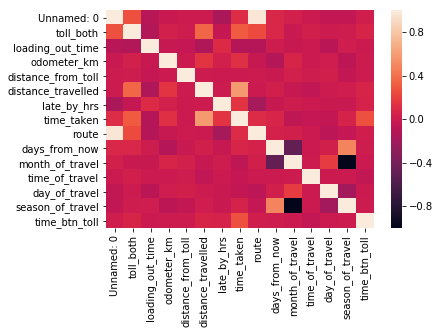

In [76]:
corr = new_toll_time.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
plt.show()

In [77]:
train_X = final_train_df.drop(['time_taken'], axis=1)
train_y = final_train_df['time_taken']

test_X = final_test_df.drop(['time_taken'], axis=1)
test_y = final_test_df['time_taken']

In [78]:
X_train, X_test, y_train, y_test = train_test_split(train_X,train_y, test_size=0.2, random_state=42)

In [79]:
scale= MinMaxScaler()
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.fit_transform(X_test)

# y_train_std = final_train_df['time_btn_toll']
# y_test_std = final_test_df['time_btn_toll']

In [80]:
# parameters = {
#     'hidden_layer_sizes':[15,20,30,40],
#     'activation':['logistic','relu','identity'],
#     'solver':['adam'],
#     'learning_rate':['invscaling','constant']
#              }

In [81]:
# reg_mlp = MLPRegressor( hidden_layer_sizes=(100,50),  activation='logistic', solver='adam', alpha=1, batch_size='auto',
#     learning_rate='constant', learning_rate_init=0.01, power_t=0.01, max_iter=5000, shuffle=False, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
#     early_stopping=False,random_state=6, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

In [82]:
parameters = {"C": [1e1, 1e2, 1e3, 1e4],
                               "gamma": np.logspace(-2, 2, 5)}

In [83]:
reg_svr = SVR(kernel='rbf', gamma=0.1)

In [84]:
# grid = GridSearchCV(reg_svr, param_grid=parameters, n_jobs=-1,
#                    scoring='r2',
#                    verbose=1)
grid = GridSearchCV(reg_svr, cv=5,
                   param_grid={"C": [1e3, 1e4],
                               "gamma": np.logspace(-2, 2, 10)}, verbose=1, n_jobs=-1, scoring='r2')

In [85]:
X_train_scaled.shape, y_train.shape

((5106, 9), (5106,))

In [86]:
grid_result = grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:  5.8min finished


In [87]:
print("Best parameters set found on development set:")
print(grid_result.best_estimator_)
print("Grid scores on development set:")
for parameters, mean_score, scores in grid_result.grid_scores_:
    print("%0.3f (+/-%0.03f) for %r"
          % (mean_score, scores.std() / 2, parameters))

Best parameters set found on development set:
SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=10.0,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
Grid scores on development set:
-0.030 (+/-0.005) for {'C': 0.1, 'gamma': 0.01}
0.022 (+/-0.005) for {'C': 0.1, 'gamma': 0.10000000000000001}
0.100 (+/-0.007) for {'C': 0.1, 'gamma': 1.0}
-0.008 (+/-0.005) for {'C': 0.1, 'gamma': 10.0}
-0.035 (+/-0.005) for {'C': 0.1, 'gamma': 100.0}
0.027 (+/-0.005) for {'C': 1.0, 'gamma': 0.01}
0.165 (+/-0.008) for {'C': 1.0, 'gamma': 0.10000000000000001}
0.323 (+/-0.011) for {'C': 1.0, 'gamma': 1.0}
0.154 (+/-0.006) for {'C': 1.0, 'gamma': 10.0}
-0.019 (+/-0.005) for {'C': 1.0, 'gamma': 100.0}
0.168 (+/-0.008) for {'C': 10.0, 'gamma': 0.01}
0.324 (+/-0.011) for {'C': 10.0, 'gamma': 0.10000000000000001}
0.435 (+/-0.011) for {'C': 10.0, 'gamma': 1.0}
0.452 (+/-0.016) for {'C': 10.0, 'gamma': 10.0}
0.107 (+/-0.004) for {'C': 10.0, 'gamma': 100.0}
0.288 (+/-0.010)

/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_search.py:761: DeprecationWarning:

The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20



In [43]:
reg_sv = SVR(C=1500, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=10.0,
  kernel='sigmoid', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [66]:
reg_sv = SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [88]:
SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=10.0,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=10.0,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [89]:
# reg_rf = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
#            max_features='auto', max_leaf_nodes=50,
#            min_impurity_decrease=0.0, min_impurity_split=None,
#            min_samples_leaf=1, min_samples_split=4,
#            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
#            oob_score=False, random_state=42, verbose=1, warm_start=False)

In [90]:
# reg_lin = LinearRegression(fit_intercept=True, normalize=True, copy_X=True, n_jobs=-1)

In [91]:
# # summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

In [92]:
reg_sv.fit(X_train_scaled, y_train)
reg_sv.score(X_test_scaled, y_test)

0.34991366885763808

In [93]:
scores = cross_val_score(reg_sv, X_train_scaled, y_train, scoring='r2', n_jobs=-1)

In [94]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.26 (+/- 0.01)


In [95]:
X_predict_scaled = MinMaxScaler().fit_transform(test_X)

In [96]:
predictions = reg_sv.predict(X_predict_scaled)

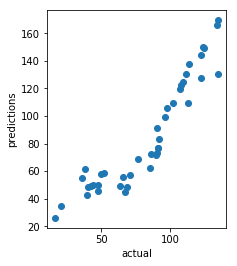

In [97]:
## The line / model
plt.scatter(test_y, predictions)
plt.ylabel('predictions')
plt.xlabel('actual')
# plt.axis('equal')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


In [98]:
test_df.shape, predictions.shape

((42, 27), (42,))

In [99]:
show_df = test_df.copy()

In [100]:
show_df['predicted'] = predictions

In [101]:
show_df['time_taken_delta'] = show_df['time_taken'].apply(lambda x: timedelta(hours=x))

In [102]:
show_df['predict_delta'] = show_df['predicted'].apply(lambda x: timedelta(hours=x))

In [103]:
show_df['predicted_ist_timestamp'] = show_df['ist_timestamp'] - show_df['time_taken_delta'] + show_df['predict_delta']

In [104]:
show_df['route'] = test_df['route'].replace(dict_route)

In [105]:
show_df['toll_both'] = show_df['toll_both'].replace(dict_toll_both)

In [106]:
show_df = show_df.sort_values(['route','vehicle_no','time_taken'])

In [107]:
show_df[['route','vehicle_no','toll_both','time_taken','predicted','ist_timestamp','predicted_ist_timestamp']]

,route,vehicle_no,toll_both,time_taken,predicted,ist_timestamp,predicted_ist_timestamp
4690,Jamshedpur HOSUR,OD04D5891,Sergrarh,63.595833,48.901976,2017-11-24 19:44:00,2017-11-24 05:02:22.114944
4601,Jamshedpur HOSUR,OD04D5891,Panikholi,66.002222,55.962630,2017-11-24 22:08:23,2017-11-24 12:06:00.469121
4473,Jamshedpur HOSUR,OD04D5891,Manguli,67.488056,44.736218,2017-11-24 23:37:32,2017-11-24 00:52:25.383770
4132,Jamshedpur HOSUR,OD04D5891,Gudipada (Old Gangapada),68.857500,48.097237,2017-11-25 00:59:42,2017-11-24 04:14:05.051550
4177,Jamshedpur HOSUR,OD04D5891,Gurapalli,71.043611,57.302723,2017-11-25 03:10:52,2017-11-24 13:26:24.802640
3929,Jamshedpur HOSUR,OD04D5891,Bellupada,85.191111,62.376072,2017-11-25 17:19:43,2017-11-24 18:30:48.859302
4425,Jamshedpur HOSUR,OD04D5891,Madapam,89.519722,71.879683,2017-11-25 21:39:26,2017-11-25 04:01:01.860258
4051,Jamshedpur HOSUR,OD04D5891,Chilakapalem,90.272500,73.475973,2017-11-25 22:24:36,2017-11-25 05:36:48.503787
4381,Jamshedpur HOSUR,OD04D5891,Laxmipuram,91.336389,76.634635,2017-11-25 23:28:26,2017-11-25 08:46:19.685807
4554,Jamshedpur HOSUR,OD04D5891,Nathavalasa/ Vizianagaram,91.336389,77.061138,2017-11-25 23:28:26,2017-11-25 09:11:55.098352
